In [1]:
# Author: Jen Epstein
# Date: August 22, 2025
# The purpose of this notebook is exploratory analysis of the PHMSA pipeline enforcement dataset for EDGI
# Data: "Enforcement Cases Initiated from 2002 (data as of 08/04/2025)" : https://primis.phmsa.dot.gov/enforcement-data/

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# import data
file = r"C:\Users\jenni\Workspaces\Projects\edgi\pipeline_enforcement\data\phmsa_pipeline_enforcement_raw_data.csv"
data = pd.read_csv(file)

# create a column with the year value
data['year'] = data['Opened_Date'].str[-4:].astype(int)

In [4]:
#data.columns

### Case types over time with penalty data

In [5]:
data['Case_Type'].unique()

array(['Notice of Probable Violation', 'Warning Letter',
       'Notice of Amendment', 'Corrective Action Order', 'Safety Order'],
      dtype=object)

In [6]:
# summarize penalty data by year and case type
penalties_case_type = data[['year','CPF_Number','Case_Type','Proposed_Penalties','Assessed_Penalties']].groupby(['year','Case_Type']).sum()[['Proposed_Penalties','Assessed_Penalties']]
penalties_case_type['num_cases'] = data.groupby(['year','Case_Type']).count().rename(columns={'CPF_Number':'num_cases'})['num_cases']
penalties_case_type

Proposed_Penalties  Assessed_Penalties  \
year Case_Type                                                              
2002 Corrective Action Order                      0.0                 0.0   
     Notice of Amendment                          0.0                 0.0   
     Notice of Probable Violation           1758950.0           1268350.0   
     Warning Letter                               0.0                 0.0   
2003 Corrective Action Order                      0.0                 0.0   
...                                               ...                 ...   
2025 Corrective Action Order                      0.0                 0.0   
     Notice of Amendment                          0.0                 0.0   
     Notice of Probable Violation           2668600.0                 0.0   
     Safety Order                                 0.0                 0.0   
     Warning Letter                               0.0                 0.0   

                                   num_cases  
year Case_Type                                
2002 Corrective Action Order               7  
     Notice of Amendment                  60  
     Notice of Probable Violation         58  
     Warning Letter                       35  
2003 Corrective Action Order              19  
...                                      ...  
2025 Corrective Action Order               1  
     Notice of Amendment                  25  
     Notice of Probable Violation         20  
     Safety Order                          1  
     Warning Letter                       18  

[112 rows x 3 columns]

In [7]:
# we see that notices of probable violation are the only case type with a penalty associated
penalties_case_type.loc[penalties_case_type['Proposed_Penalties'] > 0.0].index 

MultiIndex([(2002, 'Notice of Probable Violation'),
            (2003, 'Notice of Probable Violation'),
            (2004, 'Notice of Probable Violation'),
            (2005, 'Notice of Probable Violation'),
            (2006, 'Notice of Probable Violation'),
            (2007, 'Notice of Probable Violation'),
            (2008, 'Notice of Probable Violation'),
            (2009, 'Notice of Probable Violation'),
            (2010, 'Notice of Probable Violation'),
            (2011, 'Notice of Probable Violation'),
            (2012, 'Notice of Probable Violation'),
            (2013, 'Notice of Probable Violation'),
            (2014, 'Notice of Probable Violation'),
            (2015, 'Notice of Probable Violation'),
            (2016, 'Notice of Probable Violation'),
            (2017, 'Notice of Probable Violation'),
            (2018, 'Notice of Probable Violation'),
            (2019, 'Notice of Probable Violation'),
            (2020, 'Notice of Probable Violation'),
            

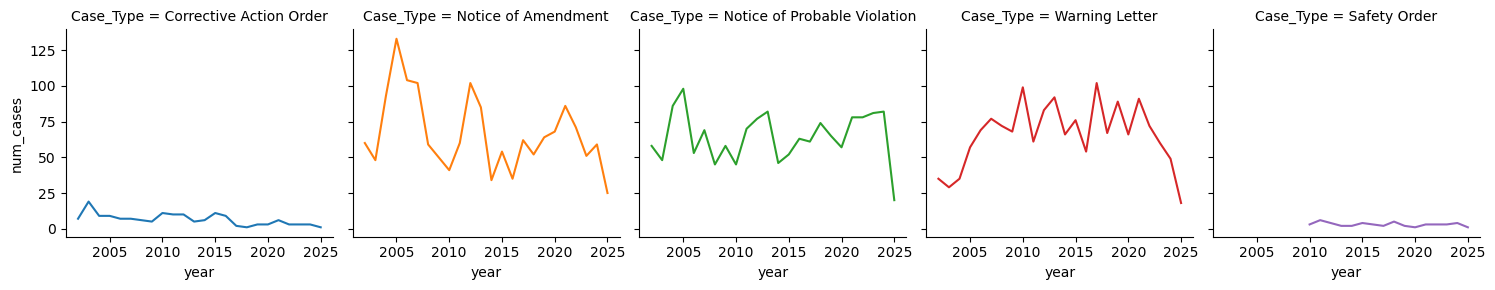

In [8]:
g = sns.FacetGrid(penalties_case_type['num_cases'].reset_index(['year','Case_Type']), col='Case_Type', hue='Case_Type')
g.map(sns.lineplot, 'year', 'num_cases')

# save the figure
path = r'C:\Users\jenni\Workspaces\Projects\edgi\pipeline_enforcement\output\case_types_time.png'
#plt.savefig(path)

### Penalties : proposed and assessed penalties

In [9]:
# filter for Notices of Probable Violation 
penalties = penalties_case_type.query("Case_Type == 'Notice of Probable Violation'").loc[penalties_case_type['Proposed_Penalties'] > 0.0]
penalties.head()

,,Proposed_Penalties,Assessed_Penalties,num_cases
year,Case_Type,,,
2002,Notice of Probable Violation,1758950.0,1268350.0,58
2003,Notice of Probable Violation,1025000.0,941750.0,48
2004,Notice of Probable Violation,2240800.0,1756300.0,86
2005,Notice of Probable Violation,4557950.0,3408085.0,98
2006,Notice of Probable Violation,3331800.0,1834500.0,53


In [10]:
penalties['assessed_per_case'] = penalties['Assessed_Penalties'] / penalties['num_cases']
penalties['proposed_per_case'] = penalties['Proposed_Penalties'] / penalties['num_cases']
penalties.head()

,,Proposed_Penalties,Assessed_Penalties,num_cases,assessed_per_case,proposed_per_case
year,Case_Type,,,,,
2002,Notice of Probable Violation,1758950.0,1268350.0,58,21868.103448,30326.724138
2003,Notice of Probable Violation,1025000.0,941750.0,48,19619.791667,21354.166667
2004,Notice of Probable Violation,2240800.0,1756300.0,86,20422.093023,26055.813953
2005,Notice of Probable Violation,4557950.0,3408085.0,98,34776.377551,46509.693878
2006,Notice of Probable Violation,3331800.0,1834500.0,53,34613.207547,62864.150943


In [11]:
# stack data for plotting
### absolute values
penalties_abs = penalties.rename(columns={'Proposed_Penalties':'Proposed','Assessed_Penalties':'Assessed'}).reindex(columns=['Proposed','Assessed']) 
penalties_abs.columns.name = 'penalty_type'
penalties_abs = penalties_abs.stack().reset_index().rename(columns={0:'value'})
penalties_abs['data_type'] = 'absolute'
penalties_abs.head()

,year,Case_Type,penalty_type,value,data_type
0,2002,Notice of Probable Violation,Proposed,1758950.0,absolute
1,2002,Notice of Probable Violation,Assessed,1268350.0,absolute
2,2003,Notice of Probable Violation,Proposed,1025000.0,absolute
3,2003,Notice of Probable Violation,Assessed,941750.0,absolute
4,2004,Notice of Probable Violation,Proposed,2240800.0,absolute


In [12]:
# stack data for plotting
### normalized values
penalties_norm = penalties[['proposed_per_case','assessed_per_case']].rename(columns={'proposed_per_case':'Proposed','assessed_per_case':'Assessed'}).reindex(columns=['Proposed','Assessed'])
penalties_norm.columns.name = 'penalty_type'
penalties_norm = penalties_norm.stack().reset_index().rename(columns={0:'value'})
penalties_norm['data_type'] = 'normalized'
penalties_norm.head()

,year,Case_Type,penalty_type,value,data_type
0,2002,Notice of Probable Violation,Proposed,30326.724138,normalized
1,2002,Notice of Probable Violation,Assessed,21868.103448,normalized
2,2003,Notice of Probable Violation,Proposed,21354.166667,normalized
3,2003,Notice of Probable Violation,Assessed,19619.791667,normalized
4,2004,Notice of Probable Violation,Proposed,26055.813953,normalized


In [13]:
# if I want a single dataset with both data types
#penalties_long = pd.concat([penalties_abs, penalties_norm], ignore_index=True)
#penalties_long

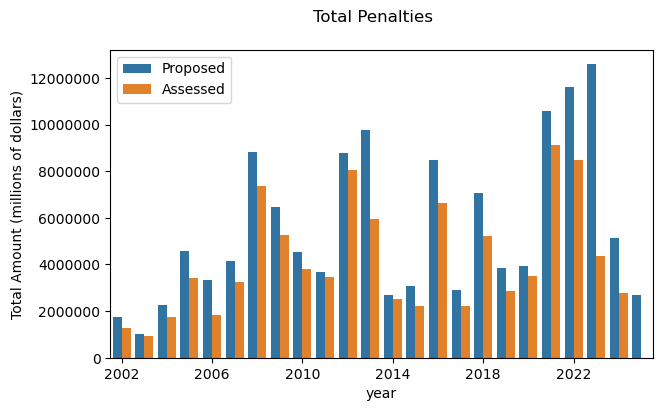

In [14]:
# plot the data
### absolute values
fig, ax = plt.subplots()
fig.set_size_inches(7, 4)
sns.barplot(penalties_abs, 
            x = 'year', 
            y= 'value',
            hue = 'penalty_type')

ax.set_ylabel('Total Amount (millions of dollars)')
fig.suptitle('Total Penalties')
plt.legend(title='')
ax.set(xticks=np.arange(0,24,4))
ax.ticklabel_format(style='plain', axis='y')

# save the figure
path = r'C:\Users\jenni\Workspaces\Projects\edgi\pipeline_enforcement\output\penalties_abs.png'
#plt.savefig(path)

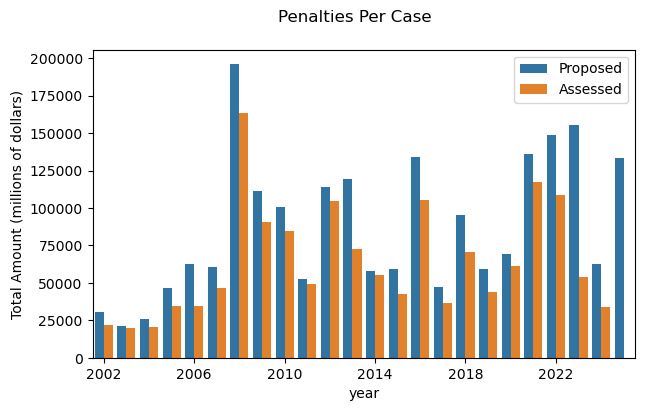

In [15]:
# plot the data
### normalized values
fig, ax = plt.subplots()
fig.set_size_inches(7, 4)
sns.barplot(penalties_norm, 
            x = 'year', 
            y = 'value',
            hue = 'penalty_type')

ax.set_ylabel('Total Amount (millions of dollars)')
fig.suptitle('Penalties Per Case')
plt.legend(title='')
ax.set(xticks=np.arange(0,24,4))
ax.ticklabel_format(style='plain', axis='y')

# save the figure
path = r'C:\Users\jenni\Workspaces\Projects\edgi\pipeline_enforcement\output\penalties_norm.png'
#plt.savefig(path)

### Basis cited for penalty reductions

In [16]:
# Assessed penalties are always less than proposed penalties
# Why are penalties reduced?
data['Basis_for_penalty_reduction'].unique()

array([nan, 'Additional evidence',
       'Not constitute violation of the regulationNot enough evidence',
       'Additional evidence; Small business', 'Small business',
       'Not constitute violation of the regulation',
       'Not constitute violation of the regulation; Statute of limitations',
       'Operator Cooperation',
       'Additional evidenceNot constitute violation of the regulation',
       'Other', 'Additional evidence; Operator Cooperation',
       'Additional evidence; Not constitute violation of the regulationStatute of limitations',
       'Additional evidence; Other',
       'Operator demonstrated an alternate method',
       'Additional evidence; Not enough evidence',
       'Operator Cooperation; Operator demonstrated an alternate method',
       'Operator Cooperation; Other',
       'Additional evidence; Operator Cooperation; Other',
       'Ability to continue in business', 'Not enough evidence',
       'Additional evidence; Additional evidenceNot enough evid

In [17]:
# how often do the various reasons occur?
# are any reasons associated with particular others?

# create a list of the reasons for penalty reductions
# right now this is derived from data['Basis_for_penalty_reduction'].unique() # should check data dictionary for complete list
bases = ['Additional evidence',
         'Not enough evidence',
         'Not constitute violation of the regulation',
         'Small business',
         'Ability to continue in business',
         'Operator Cooperation',
         'Operator demonstrated an alternate method',
         'Statute of limitations',
         'Regulation changed or deleted',
         'Other'
         ]

In [18]:
# create a column for each basis with a count of its frequency
for basis in bases:
    mask = data['Basis_for_penalty_reduction'].str.contains(basis,regex=True)==True
    data.loc[mask, basis] = int(1)
    
# replace na values with zeroes
data[bases] = data[bases].fillna(0)

# calculate the total for each basis
basis_totals = data[bases].sum(axis=0).astype('int32')

# create a df of frequency and percentage
basis_totals = pd.DataFrame({'frequency':basis_totals,
                             'percentage':(basis_totals / len(data[data['Basis_for_penalty_reduction'].notna()])*100) 
                            })

# show the df
print("There are",len(data[data['Basis_for_penalty_reduction'].notna()]),"cases with penalty reductions.\nReasons are as follows:")
basis_totals # percentages add up to >100 because some cases have multiple bases for penalty reduction

There are 317 cases with penalty reductions.
Reasons are as follows:


,frequency,percentage
Additional evidence,242,76.340694
Not enough evidence,9,2.839117
Not constitute violation of the regulation,8,2.523659
Small business,2,0.630915
Ability to continue in business,3,0.946372
Operator Cooperation,38,11.987382
Operator demonstrated an alternate method,4,1.261830
Statute of limitations,2,0.630915
Regulation changed or deleted,2,0.630915
Other,43,13.564669


In [ ]:
### NOTE -- Check work on this. This number seems quite low. ###

<Axes: title={'center': 'Penalty Reduction Bases: Number of Cases Cited'}>

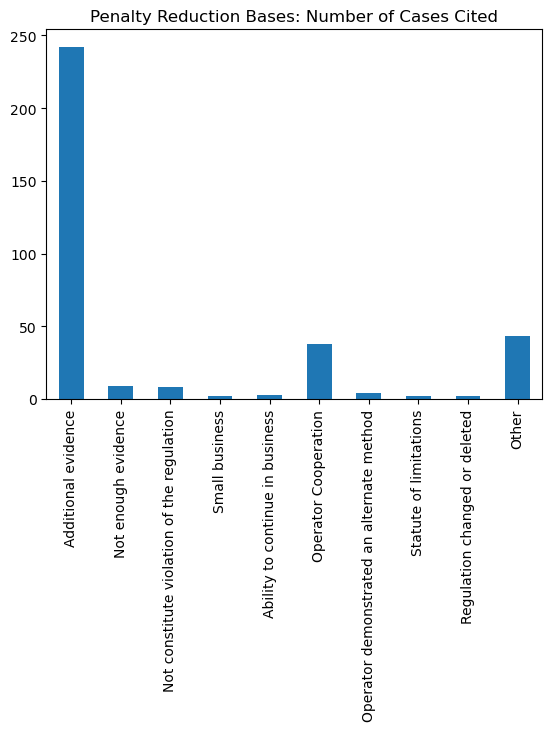

In [19]:
# plot the frequency info
basis_totals['frequency'].plot.bar(title='Penalty Reduction Bases: Number of Cases Cited')

The set of values for the reduction basis counts is [0 1 2 3]


<Axes: title={'center': 'Number of Reasons Cited per Case'}, ylabel='Frequency'>

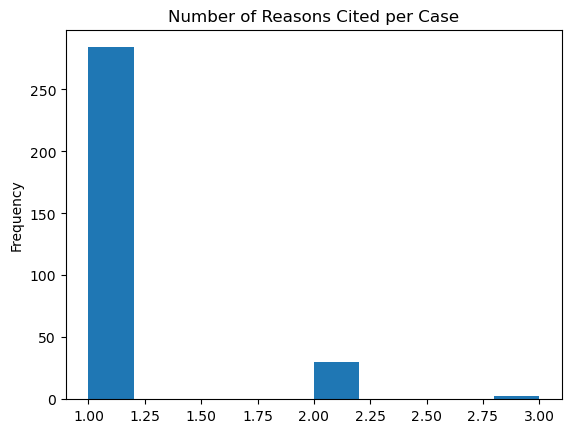

In [20]:
# count the number of reasons per case
item_totals = data[bases].sum(axis=1).astype('int32')
print("The set of values for the reduction basis counts is",item_totals.unique())
item_totals[item_totals > 0].plot.hist(title='Number of Reasons Cited per Case')

In [21]:
# create a cooccurrence matrix to show how often reasons are cited together
cooccurrence = data[bases].T.dot(data[bases]).astype('int32')
np.fill_diagonal(cooccurrence.values, 0)
cooccurrence

,Additional evidence,Not enough evidence,Not constitute violation of the regulation,Small business,Ability to continue in business,Operator Cooperation,Operator demonstrated an alternate method,Statute of limitations,Regulation changed or deleted,Other
Additional evidence,0,5,2,1,0,7,1,1,2,10
Not enough evidence,5,0,1,0,0,0,0,0,1,1
Not constitute violation of the regulation,2,1,0,0,0,0,0,2,0,0
Small business,1,0,0,0,0,0,0,0,0,0
Ability to continue in business,0,0,0,0,0,0,0,0,0,0
Operator Cooperation,7,0,0,0,0,0,1,0,0,4
Operator demonstrated an alternate method,1,0,0,0,0,1,0,0,0,0
Statute of limitations,1,0,2,0,0,0,0,0,0,0
Regulation changed or deleted,2,1,0,0,0,0,0,0,0,0
Other,10,1,0,0,0,4,0,0,0,0


In [22]:
# given the dominance of 'additional evidence' as a reason and the rarity of multiple reasons, 
# the really interesting question is, which other reasons come along with it?
print("Number of times each penalty reduction basis was cited along with 'Additional evidence':")
cooccurrence.loc['Additional evidence']

Number of times each penalty reduction basis was cited along with 'Additional evidence':


Additional evidence                            0
Not enough evidence                            5
Not constitute violation of the regulation     2
Small business                                 1
Ability to continue in business                0
Operator Cooperation                           7
Operator demonstrated an alternate method      1
Statute of limitations                         1
Regulation changed or deleted                  2
Other                                         10
Name: Additional evidence, dtype: int32

### Penalties by operator

In [23]:
# just a reminder of the table fields
data.columns

Index(['CPF_Number', 'Operator_ID', 'Operator_Name',
       'Operator_Searchable_Name', 'Region', 'Pipeline_Type',
       'How_Discovered?', 'Case_Type', 'Notice_Actions', 'Cited_Regulations',
       'Violation_Category', 'Proposed_Penalties', 'Assessed_Penalties',
       'Collected_Penalties', 'Case_Status', 'Opened_Date',
       'Latest_Order_Type', 'Latest_Order_Date', 'Closed_Date',
       'Notice_Sent_Date', 'Operator_Response_Date',
       'Operator_Request_Hearing_Date', 'Hearing_Date', 'Final_Order_Date',
       'Petition_for_Reconsideration_Date', 'Decision_on_Petition_Date',
       'Consent_Order_Date', 'Corrective_Action_Order_Date',
       'Order_Direct_Amendment_Date', 'Safety_Order_Date',
       'Penalty_Collected_Date', 'Region_Withdrawn_Date', 'Opened_Year',
       'Closed_Year', 'Order_Issued_Ind', 'Final_Order_Ind',
       'Petition_for_Reconsideration_Ind', 'Decision_on_Petition_Ind',
       'Consent_Order_Ind', 'Corrective_Action_Order_Ind',
       'Order_Direct_Ame

In [24]:
# create a df summarizing the penalties by operator
penalty_by_owner = data.groupby('Operator_Name').sum()[['Proposed_Penalties', 'Assessed_Penalties','Collected_Penalties']]
cases_by_owner = data.groupby('Operator_Name').count()[['Proposed_Penalties']].rename(columns={'Proposed_Penalties':'Number_of_Penalties'})
penalty_by_owner = penalty_by_owner.merge(cases_by_owner, on='Operator_Name')

# export as a csv
path = r"C:\Users\jenni\Workspaces\Projects\edgi\pipeline_enforcement\output\penalties_by_operator.csv"
penalty_by_owner.to_csv(path)

<Axes: title={'center': 'Frequency of Penalties Incurred by Operators'}, ylabel='Frequency'>

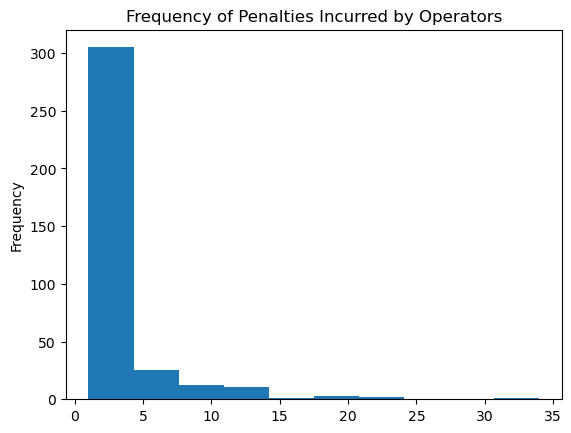

In [25]:
# see a histogram of counts of cases with penalties by operator
penalty_by_owner[penalty_by_owner['Number_of_Penalties']>0]['Number_of_Penalties'].plot.hist(title='Frequency of Penalties Incurred by Operators')

In [26]:
### Operators with most penalty cases
penalty_by_owner.sort_values(by='Number_of_Penalties',ascending=False).head(11)[['Number_of_Penalties']]

,Number_of_Penalties
Operator_Name,
"BUCKEYE PARTNERS, LP",34
"COLUMBIA GAS TRANSMISSION, LLC",24
"MAGELLAN PIPELINE COMPANY, LP",22
SUNOCO PIPELINE L.P.,20
TRANSCONTINENTAL GAS PIPE LINE COMPANY,19
ENTERPRISE PRODUCTS OPERATING LLC,18
"TEXAS EASTERN TRANSMISSION, LP (SPECTRA ENERGY PARTNERS, LP)",15
COLONIAL PIPELINE CO,14
PHILLIPS 66 PIPELINE LLC,14


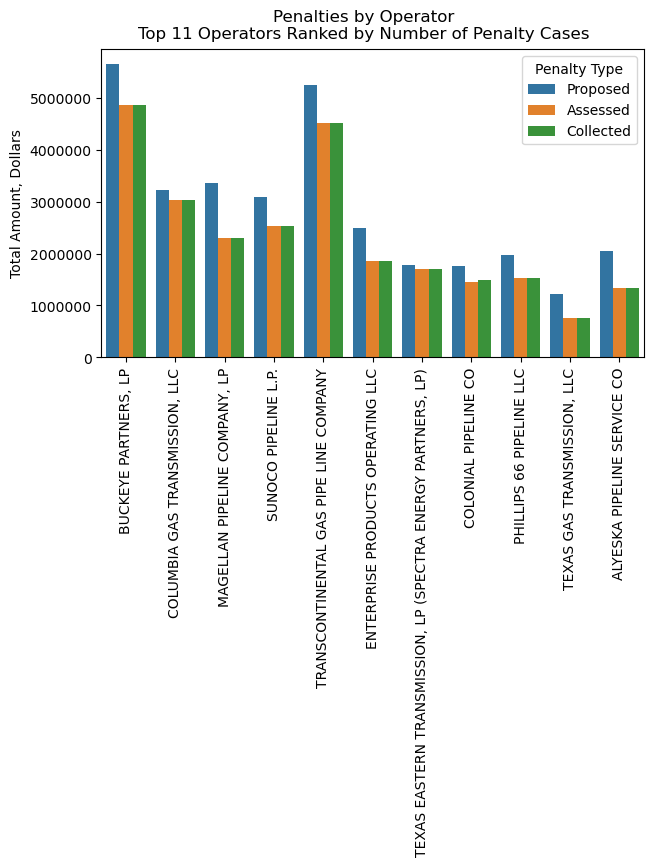

In [27]:
# plot the data

# subset the data
plot_data = penalty_by_owner.sort_values(by='Number_of_Penalties',ascending=False).head(11) # here we have top 11 number of penalty cases (n>12)
                                                                                            # the top ten had a tie for last place, hence 11

# stack data for plotting penalties by operator
plot_data = plot_data.rename(columns={'Proposed_Penalties':'Proposed','Assessed_Penalties':'Assessed','Collected_Penalties':'Collected','Number_of_Penalties':'Number'}).reindex(columns=['Proposed','Assessed','Collected']) 
plot_data.columns.name = 'penalty_type'
plot_data = plot_data.stack().reset_index().rename(columns={0:'value'})
plot_data['value'] = plot_data['value'].astype('int32')
plot_data

### absolute values
fig, ax = plt.subplots()
fig.set_size_inches(7, 4)
sns.barplot(plot_data, 
            x = 'Operator_Name', 
            y = 'value',
            hue = 'penalty_type')

ax.set_ylabel('Total Amount, Dollars')
ax.set_xlabel('')
fig.suptitle('Penalties by Operator\nTop 11 Operators Ranked by Number of Penalty Cases')
plt.legend(title='Penalty Type')
ax.ticklabel_format(style='plain', axis='y')
ax.tick_params(axis='x', labelrotation=90)

# save the figure

path = r'C:\Users\jenni\Workspaces\Projects\edgi\pipeline_enforcement\output\penalties_by_operator_most_penalty_cases.png'
#plt.savefig(path, bbox_inches='tight')

In [28]:
# how much penalty is proposed, assessed, paid for this group?
print("Operators with highest total number of penalty cases")
print("Mean")
print(plot_data.groupby('penalty_type')['value'].mean())
print("Max")
print(plot_data.groupby('penalty_type')['value'].max())
print("Min")
print(plot_data.groupby('penalty_type')['value'].min())

Operators with highest total number of penalty cases
Mean
penalty_type
Assessed     2.353524e+06
Collected    2.358359e+06
Proposed     2.894757e+06
Name: value, dtype: float64
Max
penalty_type
Assessed     4859953
Collected    4859953
Proposed     5648053
Name: value, dtype: int32
Min
penalty_type
Assessed      763200
Collected     763200
Proposed     1222200
Name: value, dtype: int32


In [29]:
### Operators with highest total proposed penalties
penalty_by_owner.sort_values(by='Proposed_Penalties',ascending=False).head(10)

,Proposed_Penalties,Assessed_Penalties,Collected_Penalties,Number_of_Penalties
Operator_Name,,,,
"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",6485100.0,6444200.0,6444200.0,8
"DENBURY GULF COAST PIPELINES, LLC",6233634.0,2868100.0,2868100.0,2
"BUCKEYE PARTNERS, LP",5648053.0,4859953.0,4859953.0,34
TRANSCONTINENTAL GAS PIPE LINE COMPANY,5243200.0,4513585.0,4513585.0,19
COLORADO INTERSTATE GAS CO,3562000.0,2489800.0,2489800.0,2
BETA OFFSHORE,3507534.0,106000.0,106000.0,3
"MAGELLAN PIPELINE COMPANY, LP",3366841.0,2297227.0,2297227.0,22
"COLUMBIA GAS TRANSMISSION, LLC",3219004.0,3037609.0,3037609.0,24
SUNOCO PIPELINE L.P.,3083300.0,2523800.0,2524144.0,20


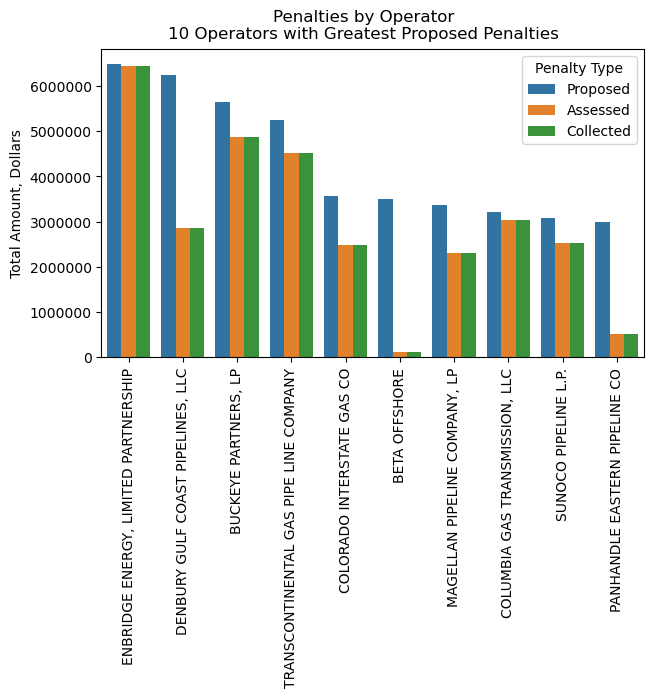

In [30]:
# plot the data

# subset the data
plot_data = penalty_by_owner.sort_values(by='Proposed_Penalties',ascending=False).head(10) # here we have top 10 by proposed penalty

# stack data for plotting penalties by operator
plot_data = plot_data.rename(columns={'Proposed_Penalties':'Proposed','Assessed_Penalties':'Assessed','Collected_Penalties':'Collected','Number_of_Penalties':'Number'}).reindex(columns=['Proposed','Assessed','Collected']) 
plot_data.columns.name = 'penalty_type'
plot_data = plot_data.stack().reset_index().rename(columns={0:'value'})
plot_data['value'] = plot_data['value'].astype('int32')
plot_data

### absolute values
fig, ax = plt.subplots()
fig.set_size_inches(7, 4)
sns.barplot(plot_data, 
            x = 'Operator_Name', 
            y = 'value',
            hue = 'penalty_type')

ax.set_ylabel('Total Amount, Dollars')
ax.set_xlabel('')
fig.suptitle('Penalties by Operator\n10 Operators with Greatest Proposed Penalties')
plt.legend(title='Penalty Type')
ax.ticklabel_format(style='plain', axis='y')
ax.tick_params(axis='x', labelrotation=90)

# save the figure

path = r'C:\Users\jenni\Workspaces\Projects\edgi\pipeline_enforcement\output\penalties_by_operator_most_penalty_proposed.png'
#plt.savefig(path, bbox_inches='tight')

In [31]:
# how much penalty is proposed, assessed, paid for this group?
print("Operators with highest total proposed penalties")
print("Mean")
print(plot_data.groupby('penalty_type')['value'].mean())
print("Max")
print(plot_data.groupby('penalty_type')['value'].max())
print("Min")
print(plot_data.groupby('penalty_type')['value'].min())

Operators with highest total proposed penalties
Mean
penalty_type
Assessed     2965517.4
Collected    2965551.8
Proposed     4333747.8
Name: value, dtype: float64
Max
penalty_type
Assessed     6444200
Collected    6444200
Proposed     6485100
Name: value, dtype: int32
Min
penalty_type
Assessed      106000
Collected     106000
Proposed     2988812
Name: value, dtype: int32
